In [1]:
# Imports 
import numpy as np
import random
import matplotlib.pyplot as plt

from datetime import datetime

In [59]:
# Parameters
n_cities = 18

n_population = 50

mutation_rate = 0.15

In [60]:
# Generating a list of coordenades representing each city
coordinates_list = [[x,y] for x,y in zip(np.random.randint(0,100,n_cities),np.random.randint(0,100,n_cities))]
names_list = np.array(['London', 'Moscow', 'Barcelona', 'Rome', 'Paris', 'Vienna', 'Munich', 'Istanbul', 'Kyiv', 'Bucharest', 'Minsk', 'Warsaw', 'Budapest', 'Milan', 'Prague', 'Sofia', 'Birmingham', 'Brussels', 'Amsterdam'])

cities_dict = { x:y for x,y in zip(names_list,coordinates_list)}
cities_dict

{'London': [29, 56],
 'Moscow': [73, 57],
 'Barcelona': [73, 5],
 'Rome': [37, 89],
 'Paris': [94, 4],
 'Vienna': [23, 46],
 'Munich': [72, 80],
 'Istanbul': [75, 62],
 'Kyiv': [29, 13],
 'Bucharest': [65, 21],
 'Minsk': [21, 13],
 'Warsaw': [72, 82],
 'Budapest': [37, 39],
 'Milan': [12, 81],
 'Prague': [65, 2],
 'Sofia': [4, 20],
 'Birmingham': [12, 58],
 'Brussels': [32, 25]}

# 1. Create the first population set

In [61]:
# First step: Create the first population set
def genesis(city_list, n_population):

    population_set = []
    for i in range(n_population):
        #Randomly generating a new solution
        sol_i = city_list[np.random.choice(list(range(n_cities)), n_cities, replace=False)]
        population_set.append(sol_i)
    return np.array(population_set)

population_set = genesis(names_list, n_population)

# add 'Berlin' at the first and last
cities_dict['Berlin'] = [0,0]
a = np.array(['Berlin']*50)
a = np.reshape(a,(50,1))

population_set = np.hstack((a, population_set, a))
population_set

array([['Berlin', 'Barcelona', 'Istanbul', 'Milan', 'London', 'Kyiv',
        'Minsk', 'Brussels', 'Rome', 'Bucharest', 'Vienna', 'Warsaw',
        'Budapest', 'Sofia', 'Prague', 'Moscow', 'Birmingham', 'Paris',
        'Munich', 'Berlin'],
       ['Berlin', 'Barcelona', 'Rome', 'London', 'Sofia', 'Warsaw',
        'Budapest', 'Brussels', 'Bucharest', 'Paris', 'Munich',
        'Birmingham', 'Prague', 'Kyiv', 'Milan', 'Moscow', 'Minsk',
        'Istanbul', 'Vienna', 'Berlin'],
       ['Berlin', 'Moscow', 'London', 'Vienna', 'Birmingham', 'Warsaw',
        'Brussels', 'Paris', 'Milan', 'Rome', 'Barcelona', 'Istanbul',
        'Budapest', 'Kyiv', 'Bucharest', 'Sofia', 'Minsk', 'Prague',
        'Munich', 'Berlin'],
       ['Berlin', 'Warsaw', 'Kyiv', 'Bucharest', 'Minsk', 'Barcelona',
        'Vienna', 'Sofia', 'Birmingham', 'Prague', 'Paris', 'London',
        'Istanbul', 'Milan', 'Brussels', 'Rome', 'Budapest', 'Munich',
        'Moscow', 'Berlin'],
       ['Berlin', 'Munich', 'Birming

# 2. Fitness Evaluation

In [62]:
# Function to compute the distance between two points
def compute_city_distance_coordinates(a,b):
    
    return np.sqrt(((a[0]-b[0])**2+(a[1]-b[1])**2))

def compute_city_distance_names(city_a, city_b, cities_dict):
    return compute_city_distance_coordinates(cities_dict[city_a], cities_dict[city_b])

In [63]:
def fitness_eval(city_list, cities_dict):
    total = 0
    for i in range(n_cities-1):
        a = city_list[i]
        b = city_list[i+1]
        total += compute_city_distance_names(a,b, cities_dict)
    return total

In [64]:
def get_all_fitnes(population_set, cities_dict):
    fitnes_list = np.zeros(n_population)

    #Looping over all solutions computing the fitness for each solution
    for i in  range(n_population):
        fitnes_list[i] = fitness_eval(population_set[i], cities_dict)

    return fitnes_list

fitnes_list = get_all_fitnes(population_set,cities_dict)
fitnes_list

array([ 912.82789305, 1005.98669983,  884.69166618,  989.50545793,
        947.8359088 ,  988.12026268,  928.75421734,  920.55142044,
        941.86321467,  759.89315338,  902.30671709,  949.57339244,
        883.34736645,  893.29237509,  987.1339566 ,  924.21062606,
        947.67673497,  932.61791192,  888.99100457,  877.81271927,
        937.64674984,  956.30084968,  762.95527281,  947.25076031,
        941.0995995 ,  825.08242997,  940.62062602,  910.84251753,
        974.93983373,  973.87022065,  789.90149386,  981.68137885,
        758.16071239,  897.55147154,  909.10666302,  999.74336411,
        955.33248766,  931.93361356,  951.37209318,  836.5236867 ,
        906.04844992,  859.96946103,  838.82065346,  745.66801844,
        930.59222799,  846.83802964,  965.80887431,  867.28901557,
        892.26792849,  850.5641978 ])

# 3. Selection

In [65]:
def progenitor_selection(population_set,fitnes_list):
    total_fit = fitnes_list.sum()
    prob_list = fitnes_list/total_fit
    
    #Notice there is the chance that a progenitor. mates with oneself
    progenitor_list_a = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    progenitor_list_b = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    
    progenitor_list_a = population_set[progenitor_list_a]
    progenitor_list_b = population_set[progenitor_list_b]
    
    
    return np.array([progenitor_list_a,progenitor_list_b])


progenitor_list = progenitor_selection(population_set[:,1:-1],fitnes_list)
progenitor_list[0][2]

array(['Istanbul', 'Sofia', 'Bucharest', 'Warsaw', 'Munich', 'Budapest',
       'Brussels', 'Vienna', 'Minsk', 'Rome', 'Barcelona', 'Kyiv',
       'Moscow', 'London', 'Milan', 'Prague', 'Birmingham', 'Paris'],
      dtype='<U10')

# 4. crossover

In [66]:
def mate_progenitors(prog_a, prog_b):
    index = np.random.randint(0,n_cities)
    offspring = prog_a[0:index]

    for city in prog_b:

        if not city in offspring:
            offspring = np.concatenate((offspring,[city]))

    return offspring
            
    
    
def mate_population(progenitor_list):
    new_population_set = []
    for i in range(progenitor_list.shape[1]):
        prog_a, prog_b = progenitor_list[0][i], progenitor_list[1][i]
        # print('prog_a: ', prog_a)
        # print('prog_b: ',  prog_b)
        offspring = mate_progenitors(prog_a, prog_b)
        new_population_set.append(offspring)
        
    return new_population_set

new_population_set = mate_population(progenitor_list)
new_population_set[0]

array(['Warsaw', 'Munich', 'Prague', 'Istanbul', 'Sofia', 'Bucharest',
       'Budapest', 'Brussels', 'Vienna', 'Minsk', 'Rome', 'Barcelona',
       'Kyiv', 'Moscow', 'London', 'Milan', 'Birmingham', 'Paris'],
      dtype='<U10')

# 5.  Mutation

In [67]:
def mutate_offspring(offspring):
    for q in range(int(n_cities*mutation_rate)):
        a = np.random.randint(0,n_cities)
        b = np.random.randint(0,n_cities)

        offspring[a], offspring[b] = offspring[b], offspring[a]

    return offspring
    
    
def mutate_population(new_population_set):
    mutated_pop = []
    for offspring in new_population_set:
        mutated_pop.append(mutate_offspring(offspring))
    return mutated_pop

mutated_pop = mutate_population(new_population_set)
mutated_pop[0]

array(['London', 'Munich', 'Milan', 'Istanbul', 'Sofia', 'Bucharest',
       'Budapest', 'Brussels', 'Vienna', 'Minsk', 'Rome', 'Barcelona',
       'Kyiv', 'Moscow', 'Warsaw', 'Prague', 'Birmingham', 'Paris'],
      dtype='<U10')

# 6. Next generation
#### it will take 10000 iterations.

In [68]:
best_solution = [-1,np.inf,np.array([])]
for i in range(3):
    print(i, fitnes_list.min(), fitnes_list.mean(), datetime.now().strftime("%d/%m/%y %H:%M"))
        
    cities_dict['Berlin'] = [0,0]
    a = np.array(['Berlin']*50)
    a = np.reshape(a,(50,1))
    mutated_pop = np.hstack((a, mutated_pop, a))
        
        
    fitnes_list = get_all_fitnes(mutated_pop,cities_dict)
    
    #Saving the best solution
    if fitnes_list.min() < best_solution[1]:
        best_solution[0] = i
        best_solution[1] = fitnes_list.min()
        best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]
    
    progenitor_list = progenitor_selection(population_set[:,1:-1],fitnes_list)
    new_population_set = mate_population(progenitor_list)
    
    mutated_pop = mutate_population(new_population_set)

0 745.6680184390533 907.0555076054454 24/11/22 16:54
1 745.851469866802 894.4174736013624 24/11/22 16:54
2 708.6084453640069 893.6241092514708 24/11/22 16:54


In [69]:
best_solution

[1,
 708.6084453640069,
 array([['Berlin', 'Minsk', 'Prague', 'Paris', 'Moscow', 'Kyiv',
         'Barcelona', 'Warsaw', 'Istanbul', 'London', 'Birmingham',
         'Vienna', 'Brussels', 'Sofia', 'Milan', 'Budapest', 'Bucharest',
         'Rome', 'Munich', 'Berlin']], dtype='<U10')]

In [70]:
best = []
for i in range(20):
    best.append(cities_dict[best_solution[2][0][i]])
    

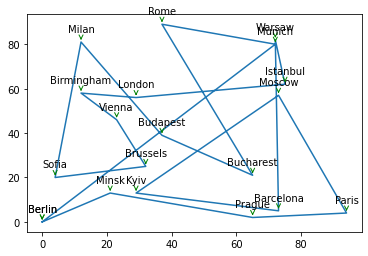

In [71]:
plt.plot(np.array(best)[:,0], np.array(best)[:,1])

#joins the x and y values
for x,y,z in zip(np.array(best)[:,0], np.array(best)[:,1], best_solution[2][0]):

    label = "{}".format(z)

    plt.annotate(label, # this is the value which we want to label (text)
                 (x,y), # x and y is the points location where we have to label
                 textcoords="offset points",
                 xytext=(0,10), # this for the distance between the points
                 # and the text label
                 ha='center',
                 arrowprops=dict(arrowstyle="->", color='green'))

plt.show()

In [72]:
population_set[0]

array(['Berlin', 'Barcelona', 'Istanbul', 'Milan', 'London', 'Kyiv',
       'Minsk', 'Brussels', 'Rome', 'Bucharest', 'Vienna', 'Warsaw',
       'Budapest', 'Sofia', 'Prague', 'Moscow', 'Birmingham', 'Paris',
       'Munich', 'Berlin'], dtype='<U10')

In [73]:
init = []
for i in range(20):
    init.append(cities_dict[population_set[0][i]])
  

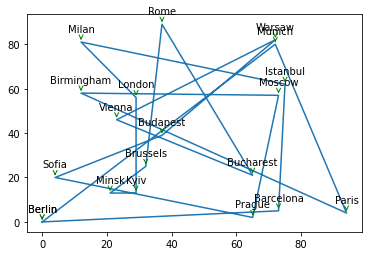

In [74]:
plt.plot(np.array(init)[:,0], np.array(init)[:,1])

#joins the x and y values
for x,y,z in zip(np.array(init)[:,0], np.array(init)[:,1], population_set[0]):

    label = "{}".format(z)

    plt.annotate(label, # this is the value which we want to label (text)
                 (x,y), # x and y is the points location where we have to label
                 textcoords="offset points",
                 xytext=(0,10), # this for the distance between the points
                 # and the text label
                 ha='center',
                 arrowprops=dict(arrowstyle="->", color='green'))

plt.show()